In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task2-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/mmorenorolon/eds220-hwk3.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

Text(0.02, 0.02, 'Data: NY State Department of Environmental Conservation (Accessed 2025-11-08)')

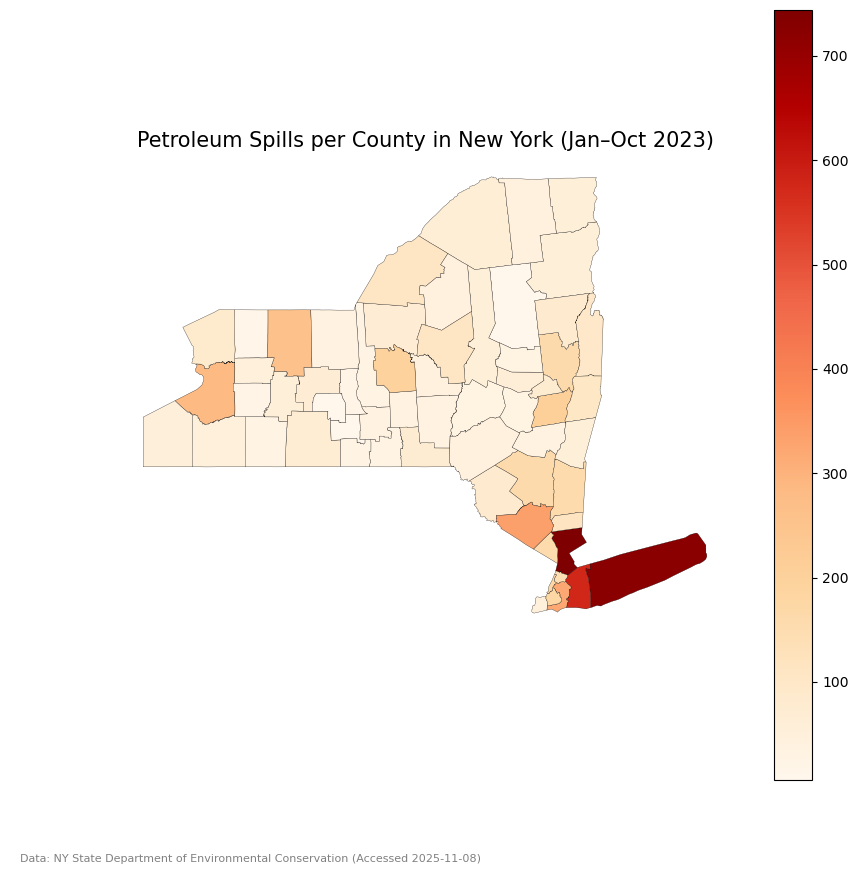

In [62]:
# COMPLETE WORKFLOW
# Load  data
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load Spills data
spills_fp = 'data/Spill_Incidents_20251108.csv'
spills = pd.read_csv(spills_fp)

# Load NY counties shapefile
counties_fp = os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp')
counties = gpd.read_file(counties_fp)


# Clean the `county` dataframe

# Keep required columns
counties = counties[['STATEFP', 'COUNTYFP', 'GEOID', 'NAME', 'geometry']]

# Clean column names
counties.columns = (counties.columns
                    .str.strip()
                    .str.lower()
                    .str.replace(' ', '_'))

# Select only NY counties
ny_counties = counties[counties['statefp'] == '36']


# Clean the `spills` dataframe

# Standardize column names
spills.columns = (spills.columns
                  .str.strip()
                  .str.lower()
                  .str.replace(' ','_'))

# Convert spill_date to datetime
spills['spill_date'] = pd.to_datetime(
    spills['spill_date'],
    format = '%m/%d/%Y',
    errors = 'raise'
)


# Filter to petroleum spills from January through October 2023

petr_23 = spills[
    (spills['material_family'] == 'Petroleum') &
    (spills['spill_date'].dt.year == 2023) &
    (spills['spill_date'].dt.month.between(1, 10))
].copy()


# Aggregate spills per county
spills_per_county = (petr_23.groupby('county', as_index=False)
                     .size()
                     .rename(columns={'size': 'n_spills'}))

# Fix misspelled St Lawrence
spills_per_county['county'] = spills_per_county['county'].replace(
    'St Lawrence', 'St. Lawrence'
)

# Rename to match NY county column
spills_per_county = spills_per_county.rename(columns={'county': 'name'})


# Inner join NY counties with spill data
ny_counties = ny_counties.merge(
    spills_per_county,
    on='name',
    how='inner'
)

# Clean join result
ny_counties = ny_counties.rename(columns={'n_spills': 'n_spills'})


# Special correction: Tuscarora reservation spill → Niagara +1
ny_counties.loc[ny_counties['name'] == 'Niagara', 'n_spills'] += 1

# Choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ny_counties.plot(
    column = 'n_spills',
    cmap = 'OrRd',
    legend = True,
    ax = ax,
    edgecolor = 'k',
    linewidth = 0.2,
    missing_kwds = {
        'color': 'lightgrey',
        'label': 'No data'
    }
)

ax.set_title('Petroleum Spills per County in New York (Jan–Oct 2023)', fontsize=15)
ax.axis('off')

plt.annotate(
    'Data: NY State Department of Environmental Conservation (Accessed 2025-11-08)',
    xy = (0.02, 0.02),
    xycoords = 'figure fraction',
    fontsize = 8,
    color = 'gray'
)

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

### Oil spills dataset metadata
Description: 
This dataset documents reported oil and hazardous material spills across New York State. Under state law, such incidents must be reported by either the responsible party or any individual aware of the spill. Data entries are based on mailing addresses, GPS coordinates, and map identification. Because the information is self-reported at the time of each event, the dataset may contain inconsistencies or gaps. 
Source date: 11/08/2025
Date of access: 11/04/2025

### TIGER shapefile dataset metadata
Description:
This dataset provides the geographic boundaries and extents of all 50 U.S. states, the District of Columbia, Puerto Rico, and the Island Areas. It includes shapefiles representing geographic features, such as points, lines, and polygons, as well as attribute relationship files. Potential limitations include address range overlaps, data gaps, odd/even number reversals, and inconsistencies in low-high orientation.  
Source date: 2023
Date of access: 11/04/2025

## 3. Import libraries

In [ ]:
# Import the libraries that will be used
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [5]:
# Import the NY spills data
fp = 'data/Spill_Incidents_20251108.csv'
spills = pd.read_csv(fp)

# Import the 2023 US Counties (and equivalent) TIGER Shapefile
fp = os.path.join('data', 'tl_2023_us_county','tl_2023_us_county.shp')
counties = gpd.read_file(fp)

In [6]:
# Keep only the `counties` columns we need for the analysis to reduce memory use
cols = ['STATEFP', 'COUNTYFP', 'GEOID', 'NAME', 'geometry']
counties = counties[cols]

<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [7]:
#a. Check the dataframe's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6


In [8]:
#b. Check the data types of the columns
spills.dtypes

Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object

In [9]:
#c. Check the unique values in the `material_family` column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [10]:
#d. Check the unique values in the `county` column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

In [11]:
# Check the null values for each column
spills.isnull().sum()

Spill Number                  0
Program Facility Name         6
Street 1                    134
Street 2                 519854
Locality                   1138
County                        0
ZIP Code                 508439
SWIS Code                     0
DEC Region                    0
Spill Date                  151
Received Date               476
Contributing Factor           0
Waterbody                516203
Source                        0
Close Date                11462
Material Name                 0
Material Family               0
Quantity                      0
Units                    115614
Recovered                     0
dtype: int64

e. The head of the dataframe provides a preview of its columns and their contents. From this preview, we can see that several columns (`units`, `waterbody`, `street_2`, and `zip_code`) contain missing values. The dataset includes 15 columns of type object, 2 columns with continuous numeric values (float64), and 3 columns of integer type (int64). Examining the unique values in the `county` column reveals the names of the counties where hazardous spills were reported. Similarly, the unique entries in the `material_family` column indicate that the records include three main types of spills: petroleum, hazardous materials, and other spill types.    

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [ ]:
# Simplify column names 
spills.columns = (spills.columns
                  .str.strip()          # Remove spacing
                  .str.lower()          # Make all text lowercase
                  .str.replace(' ','_') # Replace spaces with underscores
                  )

# View the dataframe with clean names
spills.head(3)

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [ ]:
# Update the `spill_date` data type to pandas.Datetime format
spills['spill_date'] = pd.to_datetime(spills['spill_date'],
                                      format = '%m/%d/%Y',
                                      errors = 'raise'
                                      )

In [14]:
# Check the updated data types 
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date                    object
contributing_factor              object
waterbody                        object
source                           object
close_date                       object
material_name                    object
material_family                  object
quantity                         object
units                            object
recovered                        object
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [15]:
# Select petroleum spills that took place between January 1st and October 31st of 2023
petr_23 = spills[(spills['material_family'] == 'Petroleum') &
                       (spills['spill_date'].dt.year == 2023) &
                       (spills['spill_date'].dt.month.between(1, 10))
                       ].copy()

In [ ]:
# View the first 5 rows of the dataframe
petr_23['county'].head()

221    Onondaga
222    Onondaga
223    Onondaga
224    Onondaga
225    Onondaga
Name: county, dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [ ]:
# Verify that `petr_23` only has data for 2023 from January through October
print(f'Years in petr_23: {petr_23.spill_date.dt.year.unique()}')
print(f'Months in petr_23: {petr_23.spill_date.dt.month.unique()}')

Years in petr_23: [2023]
Months in petr_23: [ 6  8  9  7  1  2  3 10  5  4]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [18]:
# Verify that `petr_23` only has data for petroleum spills
assert petr_23.material_family.unique() == 'Petroleum'
assert petr_23.material_family.nunique() == 1

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [ ]:
# Find the number of petroleum spills per county
spills_per_county = (petr_23.groupby('county', as_index = False)
                     .size()
                     .rename(columns = {'size': 'n_spills'})
                     )

# Make sure there are only two columns and are in the correct order
spills_per_county = spills_per_county[['county', 'n_spills']]

In [20]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

_Type your answer here, replacing this text._

In [21]:
# a. Check the first five rows of `counties` 
counties.head()

,STATEFP,COUNTYFP,GEOID,NAME,geometry
0,31,039,31039,Cuming,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,53069,Wahkiakum,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,35011,De Baca,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,31109,Lancaster,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,31129,Nuckolls,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [22]:
# b Check the data types of the columns in `counties`
counties.dtypes

STATEFP       object
COUNTYFP      object
GEOID         object
NAME          object
geometry    geometry
dtype: object

In [23]:
# c Check the CRS of `counties`
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

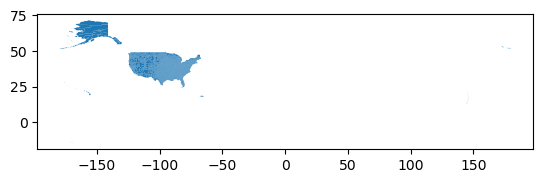

In [24]:
# d Plot `counties` geodataframe
counties.plot()

In [ ]:
# View the names of the columns in the dataframe
counties.columns

Index(['STATEFP', 'COUNTYFP', 'GEOID', 'NAME', 'geometry'], dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [26]:
# Simplify column names in `counties`
counties.columns = (counties.columns
                    .str.strip()
                    .str.lower()
                    .str.replace(' ', '_'))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

<Axes: >

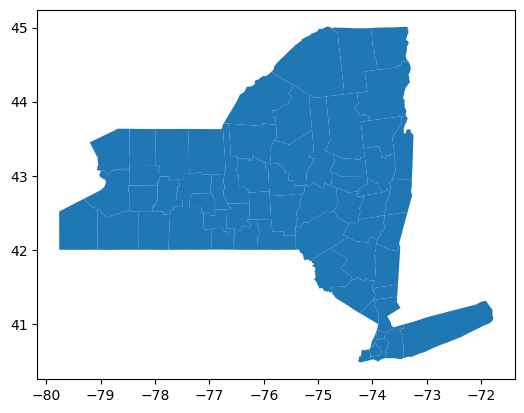

In [27]:
# Select all the counties for the state of New York 
ny_counties = counties[counties['statefp'] == '36']

# Plot the counties for the state of New York
ny_counties.plot()

In [28]:
ny_counties.head()

,statefp,countyfp,geoid,name,geometry
46,36,101,36101,Steuben,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,36091,Saratoga,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,36003,Allegany,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,36075,Oswego,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,36111,Ulster,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [29]:
# Print the names of counties in ny_counties without repetition
print(ny_counties['name'].unique())

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [30]:
# Print the names of spills_per_county without repetition 
print(spills_per_county['county'].unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [36]:
# Check which county names are in `spills_per_county` but not in `ny_counties`
diff_names_spills = np.setdiff1d(spills_per_county['county'],
                                 ny_counties['name']
                                 ).tolist() 

# View the county names in `spills_per_county` not in `ny_counties`
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [37]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [38]:
# Check which county names that are in `ny_counties` but not in `spills_per_county`
diff_names_ny = np.setdiff1d(ny_counties['name'], 
                             spills_per_county['county']
                             ).tolist()

# View the county names in `ny_counties` not in `spills_per_county`
diff_names_ny

['St. Lawrence']

In [39]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [ ]:
# e. Find the number of spills in 'Tuscarona Indian Reservation'
spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']

,county,n_spills
56,Tuscarora Indian Reservation,1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [41]:
# Update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` dataframe
spills_per_county['county'] = spills_per_county.county.replace('St Lawrence', 'St. Lawrence')

# Verify that the update was successful
assert 'St. Lawrence' in spills_per_county['county'].unique()

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [ ]:
# Rename `spills_per_county`'s `county` variable as `name`
spills_per_county = spills_per_county.rename(columns = {'county': 'name'})

# View the dataframe's updated column names
spills_per_county.columns

Index(['name', 'n_spills'], dtype='object')

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [ ]:
# Merge the `spills_per_county` and `ny_counties` dataframes
ny_counties = ny_counties.merge(spills_per_county,
                                on = 'name',
                                how = 'inner'
)

# View the `ny_counties` dataframe with the inner join
ny_counties.head()

,statefp,countyfp,geoid,name,geometry,n_spills_x,n_spills_y
0,36,101,36101,Steuben,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72,72
1,36,091,36091,Saratoga,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",162,162
2,36,003,36003,Allegany,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30,30
3,36,075,36075,Oswego,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68,68
4,36,111,36111,Ulster,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",162,162


In [48]:
# Remove the `n_spills_y` column
ny_counties = ny_counties.drop(columns=['n_spills_y'])

# Rename the `n_spills_x` column as `n_spills`
ny_counties = ny_counties.rename(columns = {'n_spills_x': 'n_spills'})

# View the updated dataframe
ny_counties.head()

,statefp,countyfp,geoid,name,geometry,n_spills
0,36,101,36101,Steuben,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,36091,Saratoga,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",162
2,36,003,36003,Allegany,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,36075,Oswego,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,36111,Ulster,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",162



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [ ]:
# Number of spills in Niagara county before adding the Tuscarora Indian Reservation spill
n_spills_before = ny_counties.loc[ny_counties['name'] == 'Niagara']

# View the number of spills before adding the Tuscarora Indian Reservation spill
n_spills_before

,statefp,countyfp,geoid,name,geometry,n_spills_x,n_spills_y
45,36,063,36063,Niagara,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",88,88


In [49]:
# Add one spill to Niagara county (run this cell only once)
ny_counties.loc[ny_counties['name'] == 'Niagara', 'n_spills'] += 1

In [50]:

# 5. Verify that the dataframe was updated
ny_counties.loc[ny_counties['name'] == 'Niagara']

,statefp,countyfp,geoid,name,geometry,n_spills
45,36,063,36063,Niagara,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",89


## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



Text(0.02, 0.02, 'Data: NY State Department of Environmental Conservation (Accessed 2025-11-08)')

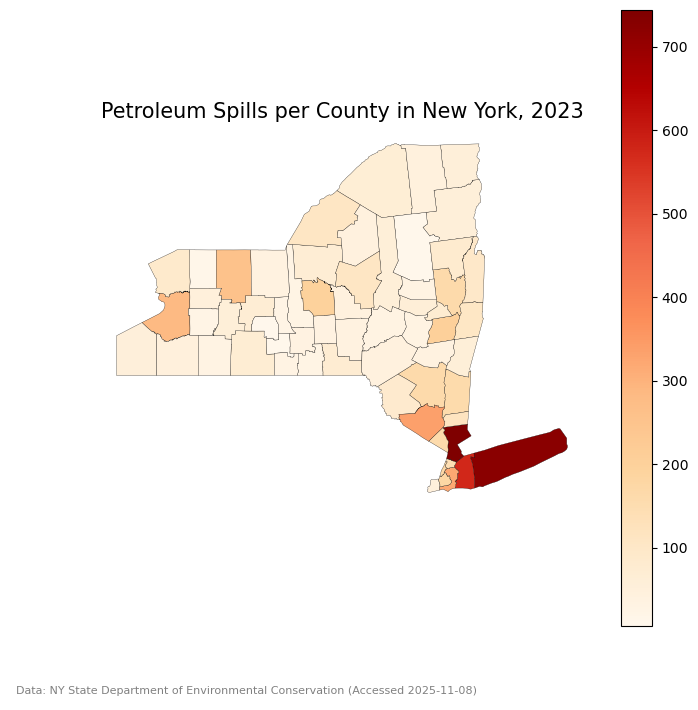

In [60]:
# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

# Cloropleth Map
# Plot counties by number of petroleum spills
ny_counties.plot(column = 'n_spills',
                 cmap = 'OrRd',           # Set the colormap  to orange-red
                 legend = True,           # Include a legend
                 ax = ax,                 # Plot on the current axis
                 edgecolor = 'k',         # Outline the county borders 
                 linewidth = 0.2,
                 missing_kwds = {'color': 'lightgrey', # Appearance for missing data values, if any
                                 'label': 'No data'}
                )

# Create a title for the plot
ax.set_title('Petroleum Spills per County in New York, 2023', fontsize = 15)

# No x- or y-axis ticks or labels 
ax.axis('off')

# Add data source and date of access
plt.annotate(
    'Data: NY State Department of Environmental Conservation (Accessed 2025-11-08)',
    xy = (0.02, 0.02), 
    xycoords = 'figure fraction', 
    fontsize = 8,
    color = 'gray'
    )


b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

To create the map, I combined petroleum spill records from the New York State Department of Environmental Conservation with county boundary data from the 2023 TIGER/Line shapefiles. I cleaned the spill dataset by standardizing column names, converting the spill date to a datetime format, and filtering the data to include only petroleum spills that occurred between January and October 2023. I then aggregated the number of spills per county and standardized county names to merge with the spatial dataframe. Following the merge, I added one spill to Niagara County to account for an incident occurring within the Tuscarora Indian Reservation, which is not represented in the TIGER county boundaries. Finally, I created the choropleth mao using GeoPandas and Matplotlib, coloring counties by their spill totals using an orange-red colormap, removing axes for a clean layout, adding a title, a legend, and a data-source annotation. 

One key takeaway from this analysis is how petroleum spills are heavily concentrated in downstate counties, especially Suffolk, Nassau, Queens, and Kings, which report the highest numbers. Many upstate counties have comparatively few incidents. The spatial pattern reflects population density and infrastructure intensity, which indicates there are greater spill risks in more urbanized areas. In conclusion, the workflow highlights the importance of data cleaning and name alignment when integrating environmental records with spatial datasets.

## Complete workflow

**STILL WORKING ON THIS**

Collect all the relevant code into a **new notebook** titled `hwk3-task1-spills-COMPLETE-YOURLASTNAME.ipynb`. This notebook should have two sections:the a single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.



**From last HW:**

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [61]:
grader.check_all()

7Ac results: All test cases passed!

7Ad results: All test cases passed!

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expected_data = pd.read_csv('data/q5d_df.csv').drop(columns='Unnamed: 0')
                    pd.testing.assert_frame_equal(expected_data, student_data)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q3(spills_per_county)
        Expecting nothing
        **********************************************************************
        Line 7, in q5d 0
        Failed example:
            test_q3(spills_per_county)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q5d 0[0]>", line 4, in test_q3
                pd.testing.assert_frame_equal(expected_data, student_data)
              File "c:\